# Bitcoin wrangling 1

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def wrangle(path):
    # Load data
    df = pd.read_csv(path, skiprows=1)

    # Convert first column to datetime 
    df['date'] = pd.to_datetime(df['unix'], unit = "s")
    df = df.sort_values(by='date', ascending=True)

    # Set index
    df.set_index('date', inplace=True)

    # Only select data from 2024
    df = df[df.index.year == 2024]

    # Drop columns
    df = df.drop(columns=['unix', 'symbol'])

    # Rename columns 
    df.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'Volume BTC': 'VolumeBTC',
    'Volume USD': 'VolumeUSD'
    }, inplace=True)

    return df

In [3]:
df = wrangle("/Users/alexzheng/Developer/GitHub/EC331-project/EMH/data/Bitstamp_BTCUSD_2024_minute.csv")

In [4]:
df.count()

Open         509364
High         509364
Low          509364
Close        509364
VolumeBTC    509364
VolumeUSD    509364
dtype: int64

In [5]:
df

,Open,High,Low,Close,VolumeBTC,VolumeUSD
date,,,,,,
2024-01-01 00:00:00,42258.0,42268.0,42257,42268,1.049735,44370.180382
2024-01-01 00:01:00,42268.0,42283.0,42268,42283,2.291939,96910.057583
2024-01-01 00:02:00,42288.0,42298.0,42288,42298,1.569998,66407.775404
2024-01-01 00:03:00,42297.0,42353.0,42297,42353,4.883858,206846.034909
2024-01-01 00:04:00,42359.0,42375.0,42359,42375,5.742427,243335.353448
...,...,...,...,...,...,...
2024-12-31 23:55:00,93476.0,93476.0,93471,93471,0.179799,16805.981112
2024-12-31 23:56:00,93469.0,93469.0,93469,93469,0.021400,2000.236600
2024-12-31 23:57:00,93462.0,93462.0,93413,93427,0.034750,3246.554616


In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 509364 entries, 2024-01-01 00:00:00 to 2024-12-31 23:59:00
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Open       509364 non-null  float64
 1   High       509364 non-null  float64
 2   Low        509364 non-null  int64  
 3   Close      509364 non-null  int64  
 4   VolumeBTC  509364 non-null  float64
 5   VolumeUSD  509364 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 27.2 MB
None
                Open           High            Low          Close  \
count  509364.000000  509364.000000  509364.000000  509364.000000   
mean    65864.550468   65883.597982   65845.495210   65864.742420   
std     14578.983088   14582.785358   14574.827791   14578.730682   
min     38515.000000   38525.000000   38505.000000   38508.000000   
25%     59058.000000   59076.000000   59040.000000   59059.000000   
50%     64208.000000   64225.000000   64191.000000   64208

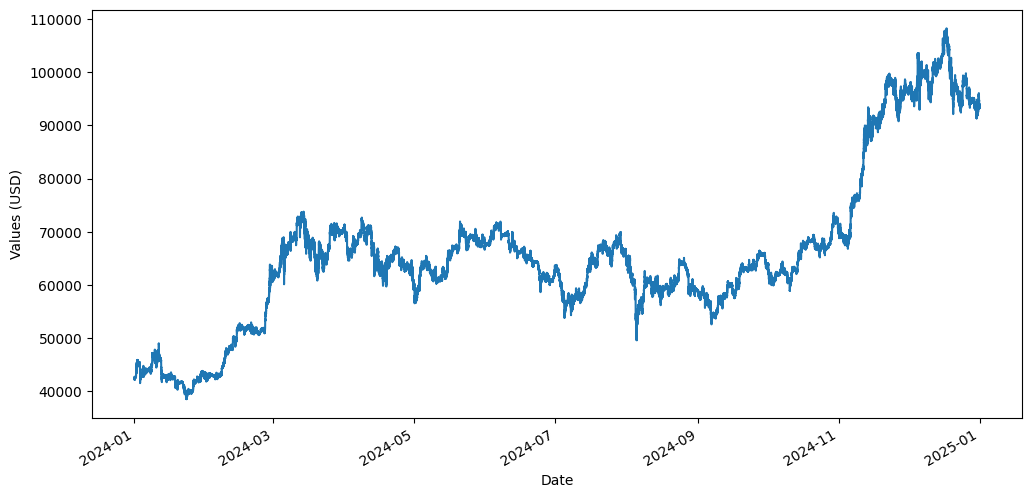

In [7]:
# Plot the 'close' prices
df['Close'].plot(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Values (USD)');

In [8]:
df.to_csv("/Users/alexzheng/Developer/GitHub/EC331-project/EMH/data/Bitcoin_data_2024.csv")